<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230706_local_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Local images CNN

In [51]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [56]:
!gdown https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

Downloading...
From: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 219MB/s]


In [57]:
!unzip /content/cats_and_dogs_filtered.zip

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

In [58]:
train_dir = '/content/cats_and_dogs_filtered/train'
val_dir = '/content/cats_and_dogs_filtered/validation'

In [59]:
import os

train_cats_fname = os.listdir(os.path.join(train_dir, 'cats'))
train_dogs_fname = os.listdir(os.path.join(train_dir, 'dogs'))

In [6]:
len(train_cats_fname)

1000

In [60]:
class_names = ['cats', 'dogs']

In [61]:
import PIL
X_train = []
y_train = []

# cats
for i in range(len(train_cats_fname)):
  f = os.path.join(train_dir, 'cats', train_cats_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_train.append(arr)
  y_train.append(0)

In [9]:
X_train[0].shape

(224, 224, 3)

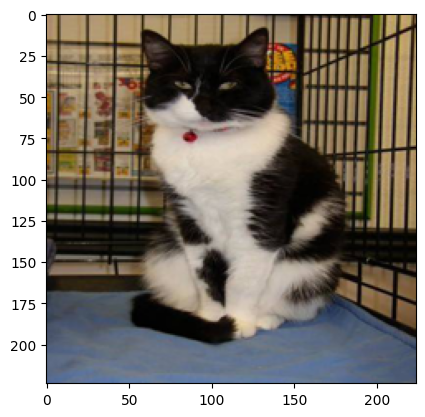

In [10]:
plt.imshow(X_train[0])
plt.show()

In [62]:
# dogs
for i in range(len(train_dogs_fname)):
  f = os.path.join(train_dir, 'dogs', train_dogs_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_train.append(arr)
  y_train.append(1)

In [63]:
# validation
X_val = []
y_val = []

val_cats_fname = os.listdir(os.path.join(val_dir, 'cats'))
val_dogs_fname = os.listdir(os.path.join(val_dir, 'dogs'))

# cats
for i in range(len(val_cats_fname)):
  f = os.path.join(val_dir, 'cats', val_cats_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_val.append(arr)
  y_val.append(0)

# dogs
for i in range(len(val_dogs_fname)):
  f = os.path.join(val_dir, 'dogs', val_dogs_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_val.append(arr)
  y_val.append(1)

In [13]:
len(X_val), len(X_train)

(1000, 2000)

In [64]:
X_train = np.array(X_train)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [15]:
samples = np.random.randint(2000, size = 9)

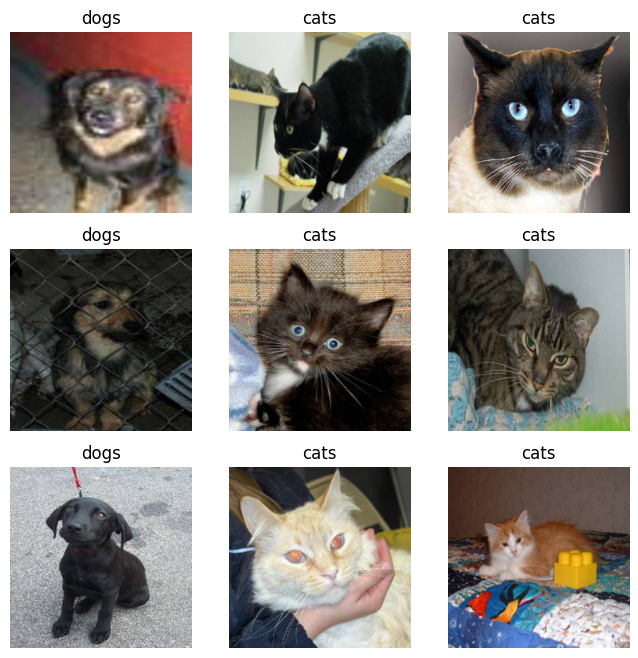

In [16]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx])
    plt.axis('off')
    plt.title(class_names[y_train[idx]])
plt.show()

## image scaling

In [65]:
X_train = X_train.astype('float32')/225.
X_val = X_val.astype('float32')/255.

In [18]:
# model 구성
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
X_train.shape, X_val.shape

((2000, 224, 224, 3), (1000, 224, 224, 3))

In [69]:
from tensorflow import keras
from keras import layers

# model = keras.Sequential([
#     layers.Conv2D(128, 3, activation='relu', input_shape=(224, 224, 3)),
#     layers.Conv2D(64, 3, activation='relu'),
#     layers.MaxPooling2D(2),

#     layers.Conv2D(32, 3, activation='relu'),
#     layers.Conv2D(16, 3, activation='relu'),
#     layers.MaxPooling2D(2),

#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])
from tensorflow.keras.applications import VGG16

base = VGG16(
    include_top=False,
    input_shape=(224, 224, 3)
)
base.trainable=False

from tensorflow import keras
from keras import layers
model = keras.Sequential([
    base,
    layers.Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])# flatten뒤에 분류기를 더 복잡하게 만들어도 된다
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_2 (Dropout)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
N

In [70]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [71]:
EPOCHS = 30
BATCH = 64

history = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val),
    verbose = 1
)

Epoch 1/30
32/32 [==============================] - 33s 726ms/step - loss: 1.4545 - accuracy: 0.6340 - val_loss: 0.4125 - val_accuracy: 0.8660
Epoch 2/30
32/32 [==============================] - 14s 431ms/step - loss: 0.3336 - accuracy: 0.8770 - val_loss: 0.2966 - val_accuracy: 0.8910
Epoch 3/30
32/32 [==============================] - 12s 383ms/step - loss: 0.2578 - accuracy: 0.9010 - val_loss: 0.2518 - val_accuracy: 0.9100
Epoch 4/30
32/32 [==============================] - 12s 381ms/step - loss: 0.1928 - accuracy: 0.9270 - val_loss: 0.2285 - val_accuracy: 0.9140
Epoch 5/30
32/32 [==============================] - 13s 418ms/step - loss: 0.1586 - accuracy: 0.9515 - val_loss: 0.2140 - val_accuracy: 0.9120
Epoch 6/30
32/32 [==============================] - 13s 421ms/step - loss: 0.1288 - accuracy: 0.9590 - val_loss: 0.2033 - val_accuracy: 0.9220
Epoch 7/30
32/32 [==============================] - 13s 423ms/step - loss: 0.1110 - accuracy: 0.9665 - val_loss: 0.2027 - val_accuracy: 0.9230

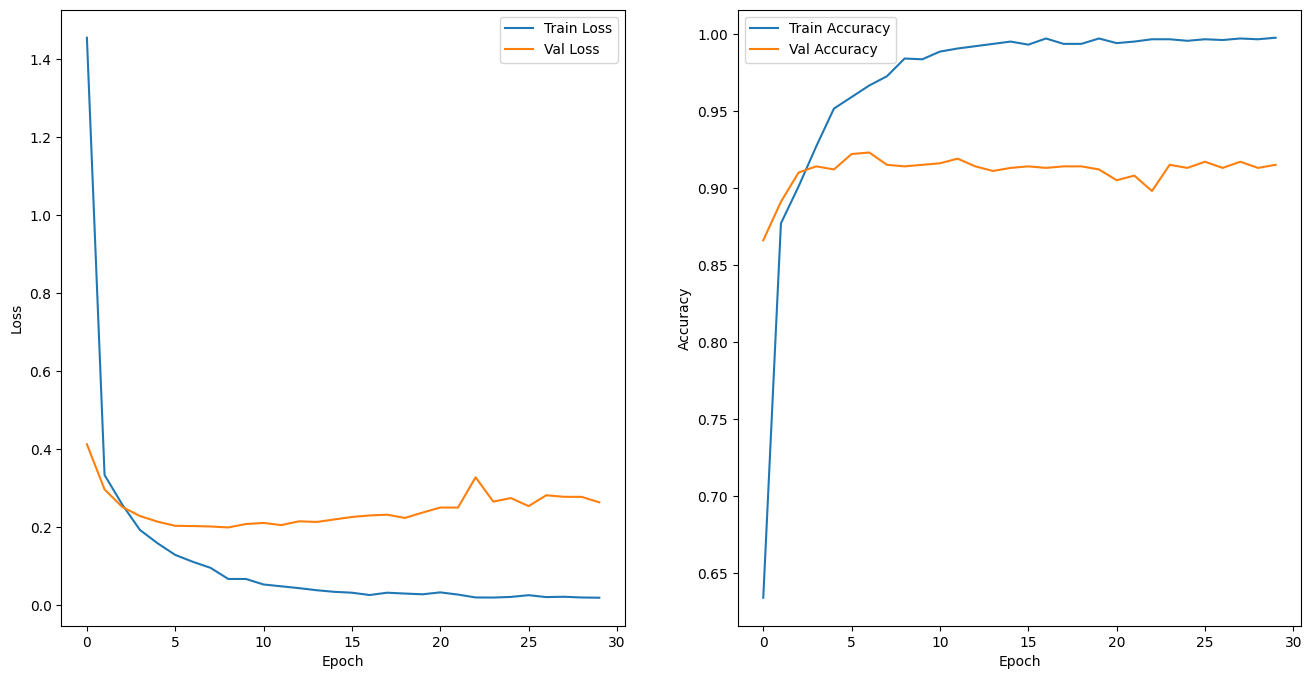

In [72]:
# 그래프
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

plot_history(history)

## earlystopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=5)
ckpt = './ckpt/cat_dog.ckpt'
mc = ModelCheckpoint(ckpt, monitor ='val_loss', save_weights_only=True, save_best_only=True, verbose=1)

In [ ]:
EPOCHS = 30
BATCH = 64

history = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val),
    callbacks=[es, mc],
    verbose = 1
)

In [ ]:
model.load_weights(ckpt)

In [ ]:
from sklearn.model_selection import train_test_split

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

# 마스크 CNN

In [5]:
!gdown https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP

Downloading...
From: https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP
To: /content/MaskDatasets.zip
100% 216M/216M [00:00<00:00, 304MB/s]


In [6]:
!unzip /content/MaskDatasets.zip

Archive:  /content/MaskDatasets.zip
   creating: MaskDatasets/
   creating: MaskDatasets/Test/
   creating: MaskDatasets/Test/Mask/
  inflating: MaskDatasets/Test/Mask/2070.jpg  
  inflating: MaskDatasets/Test/Mask/2072.jpg  
  inflating: MaskDatasets/Test/Mask/2083.jpg  
  inflating: MaskDatasets/Test/Mask/2085.jpg  
  inflating: MaskDatasets/Test/Mask/2086.jpg  
  inflating: MaskDatasets/Test/Mask/2110.jpg  
  inflating: MaskDatasets/Test/Mask/2113.jpg  
  inflating: MaskDatasets/Test/Mask/2114.jpeg  
  inflating: MaskDatasets/Test/Mask/2130.jpg  
  inflating: MaskDatasets/Test/Mask/2132.jpg  
  inflating: MaskDatasets/Test/Mask/2135.jpg  
  inflating: MaskDatasets/Test/Mask/2154.png  
  inflating: MaskDatasets/Test/Mask/2158.png  
  inflating: MaskDatasets/Test/Mask/2159.png  
  inflating: MaskDatasets/Test/Mask/2160.png  
  inflating: MaskDatasets/Test/Mask/2170.png  
  inflating: MaskDatasets/Test/Mask/2172.png  
  inflating: MaskDatasets/Test/Mask/2173.png  
  inflating: MaskData

In [7]:
train_dir = '/content/MaskDatasets/Train'
val_dir = '/content/MaskDatasets/Validation'

In [8]:
import os

train_NoMask_fname = os.listdir(os.path.join(train_dir, 'NoMask'))
train_Mask_fname = os.listdir(os.path.join(train_dir, 'Mask'))

In [9]:
class_names = ['Mask', 'NoMask']

In [12]:
import PIL
X_train = []
y_train = []

# cats
for i in range(len(train_Mask_fname)):
  f = os.path.join(train_dir, 'Mask', train_Mask_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_train.append(arr)
  y_train.append(0)

for i in range(len(train_NoMask_fname)):
  f = os.path.join(train_dir, 'NoMask', train_NoMask_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_train.append(arr)
  y_train.append(1)

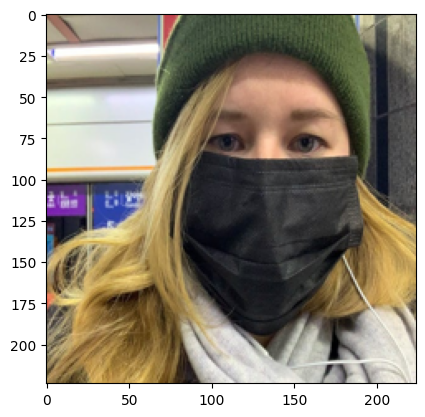

In [13]:
plt.imshow(X_train[0])
plt.show()

In [14]:
X_val = []
y_val = []

val_NoMask_fname = os.listdir(os.path.join(val_dir, 'NoMask'))
val_Mask_fname = os.listdir(os.path.join(val_dir, 'Mask'))

# NoMask
for i in range(len(val_NoMask_fname)):
  f = os.path.join(val_dir, 'NoMask', val_NoMask_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_val.append(arr)
  y_val.append(0)

# Mask
for i in range(len(val_Mask_fname)):
  f = os.path.join(val_dir, 'Mask', val_Mask_fname[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X_val.append(arr)
  y_val.append(1)

In [16]:
X_train = np.array(X_train)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [19]:
X_train.shape

(600, 224, 224, 3)

In [20]:
samples = np.random.randint(600, size = 9)

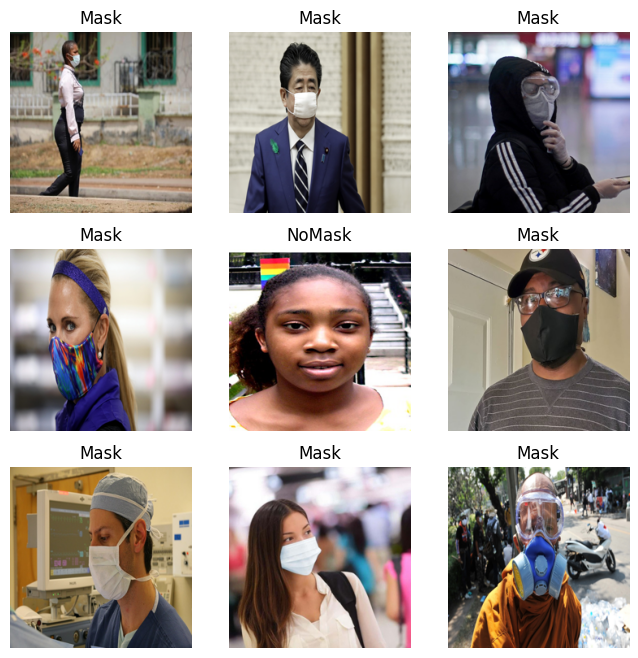

In [21]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx])
    plt.axis('off')
    plt.title(class_names[y_train[idx]])
plt.show()

In [22]:
X_train = X_train.astype('float32')/225.
X_val = X_val.astype('float32')/255.

In [23]:
X_train.shape, X_val.shape

((600, 224, 224, 3), (306, 224, 224, 3))

In [24]:
from tensorflow import keras
from keras import layers

model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ]
)
model.summary()

In [34]:
# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# EPOCHS = 30
# BATCH = 64

# history = model.fit(
#     X_train, y_train,
#     epochs = EPOCHS,
#     batch_size = BATCH,
#     validation_data =(X_val, y_val),
#     verbose = 1
# )
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose =1)

Epoch 1/100
19/19 [==============================] - 6s 262ms/step - loss: 3.8060e-05 - accuracy: 1.0000 - val_loss: 13.6893 - val_accuracy: 0.1209
Epoch 2/100
19/19 [==============================] - 5s 243ms/step - loss: 2.5503e-05 - accuracy: 1.0000 - val_loss: 14.2589 - val_accuracy: 0.1209
Epoch 3/100
19/19 [==============================] - 5s 242ms/step - loss: 1.2224e-05 - accuracy: 1.0000 - val_loss: 14.6396 - val_accuracy: 0.1209
Epoch 4/100
19/19 [==============================] - 5s 249ms/step - loss: 7.6022e-06 - accuracy: 1.0000 - val_loss: 15.0471 - val_accuracy: 0.1176
Epoch 5/100
19/19 [==============================] - 5s 246ms/step - loss: 5.9671e-06 - accuracy: 1.0000 - val_loss: 15.3928 - val_accuracy: 0.1209
Epoch 6/100
19/19 [==============================] - 5s 242ms/step - loss: 5.1031e-06 - accuracy: 1.0000 - val_loss: 15.7137 - val_accuracy: 0.1209
Epoch 7/100
19/19 [==============================] - 5s 240ms/step - loss: 4.0222e-06 - accuracy: 1.0000 - val_l

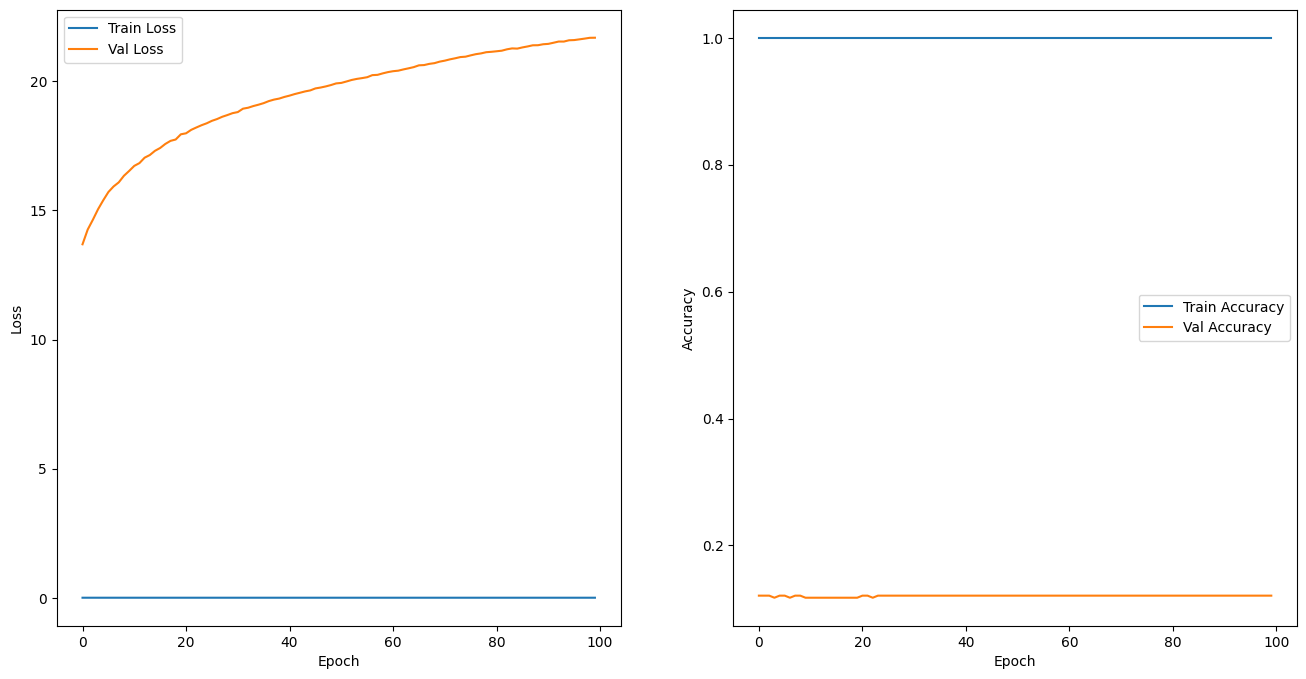

In [37]:
# 그래프
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

plot_history(history)

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [32]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/100
19/19 [==============================] - 12s 345ms/step - loss: 6.7679e-05 - accuracy: 1.0000 - val_loss: 12.3257 - val_accuracy: 0.1176
Epoch 2/100
19/19 [==============================] - 5s 255ms/step - loss: 5.9274e-05 - accuracy: 1.0000 - val_loss: 12.5286 - val_accuracy: 0.1176
Epoch 3/100
19/19 [==============================] - 5s 245ms/step - loss: 5.0368e-05 - accuracy: 1.0000 - val_loss: 12.6405 - val_accuracy: 0.1176
Epoch 4/100
19/19 [==============================] - 5s 245ms/step - loss: 4.6458e-05 - accuracy: 1.0000 - val_loss: 12.7543 - val_accuracy: 0.1176
Epoch 5/100
19/19 [==============================] - 5s 241ms/step - loss: 3.9408e-05 - accuracy: 1.0000 - val_loss: 12.8792 - val_accuracy: 0.1209
Epoch 6/100
19/19 [==============================] - 4s 238ms/step - loss: 3.5377e-05 - accuracy: 1.0000 - val_loss: 13.0621 - val_accuracy: 0.1209


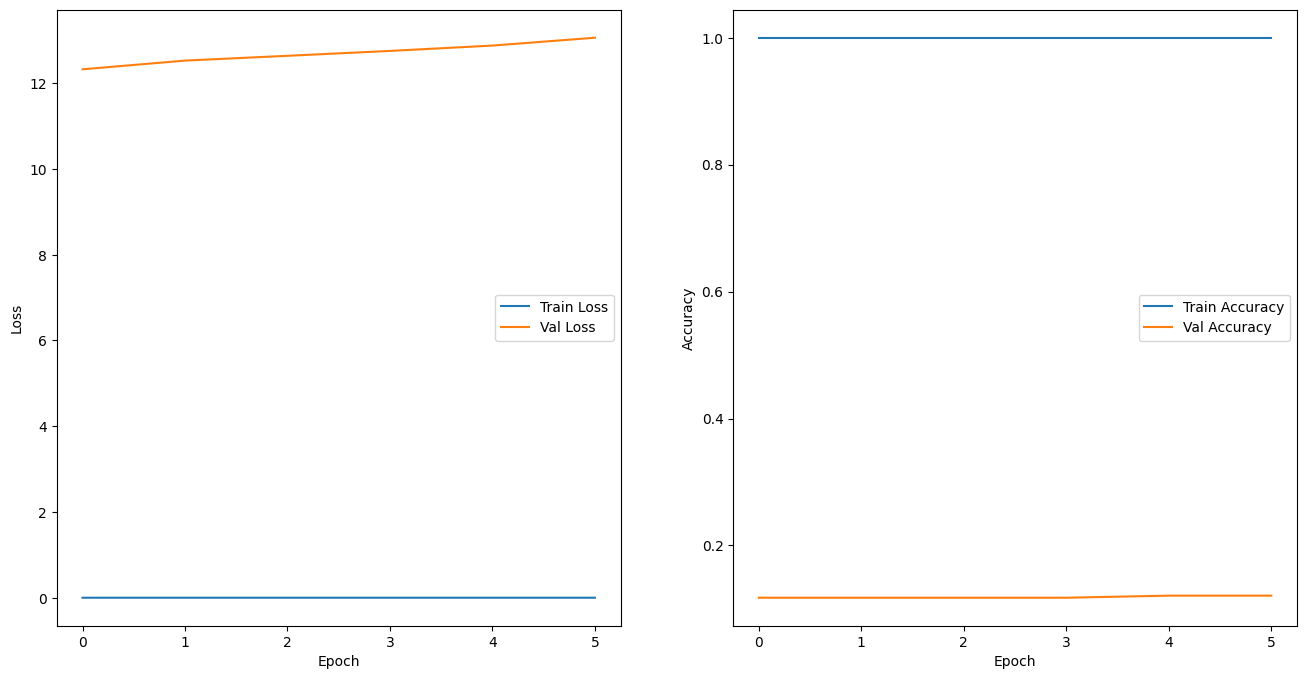

In [33]:
# 그래프
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
X_test = []
y_test = []

for i in trange(len(test_mask_fnames)):
    img = PIL.Image.open(os.path.join(test_dir, 'Mask', test_mask_fnames[i]))
    img = img.resize((224, 224))
    img = np.array(img)
    X_test.append(img)
    y_test.append(0)

for i in trange(len(test_nomask_fnames)):
    img = PIL.Image.open(os.path.join(test_dir, 'NoMask', test_nomask_fnames[i]))
    img = img.resize((224, 224))
    img = np.array(img)
    X_test.append(img)
    y_test.append(1)

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_test = X_test / 255

# Cifar (전이학습)

이미 있는 모델을 사용하고 마지막 layer만 바꾼 것

In [38]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [39]:
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)

In [40]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [43]:
X_train = X_train/225.
X_val = X_val/255.
X_test = X_test/255.

In [44]:
from keras.utils import to_categorical

y_train_o =  to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [45]:
X_val = X_val.reshape(-1, 32,32,3)
X_test = X_test.reshape(-1, 32,32,3)
X_train = X_train.reshape(-1, 32,32,3)

In [36]:
from tensorflow.keras.applications import VGG16

base = VGG16(
    include_top=False,
    input_shape=(32,32,3)
)
base.trainable=False

base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [46]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])# flatten뒤에 분류기를 더 복잡하게 만들어도 된다
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [47]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
EPOCHS = 30
BATCH = 256

history = model.fit(
    X_train, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val_o),
    verbose = 1
)

Epoch 1/30
157/157 [==============================] - 10s 47ms/step - loss: 1.5086 - accuracy: 0.4780 - val_loss: 1.3328 - val_accuracy: 0.5366
Epoch 2/30
157/157 [==============================] - 6s 37ms/step - loss: 1.2383 - accuracy: 0.5713 - val_loss: 1.2516 - val_accuracy: 0.5604
Epoch 3/30
157/157 [==============================] - 5s 34ms/step - loss: 1.1692 - accuracy: 0.5957 - val_loss: 1.2101 - val_accuracy: 0.5786
Epoch 4/30
157/157 [==============================] - 6s 36ms/step - loss: 1.1277 - accuracy: 0.6096 - val_loss: 1.1735 - val_accuracy: 0.5901
Epoch 5/30
157/157 [==============================] - 6s 36ms/step - loss: 1.0948 - accuracy: 0.6201 - val_loss: 1.1661 - val_accuracy: 0.5951
Epoch 6/30
157/157 [==============================] - 5s 35ms/step - loss: 1.0734 - accuracy: 0.6271 - val_loss: 1.1565 - val_accuracy: 0.5991
Epoch 7/30
157/157 [==============================] - 6s 36ms/step - loss: 1.0436 - accuracy: 0.6384 - val_loss: 1.1427 - val_accuracy: 0.606

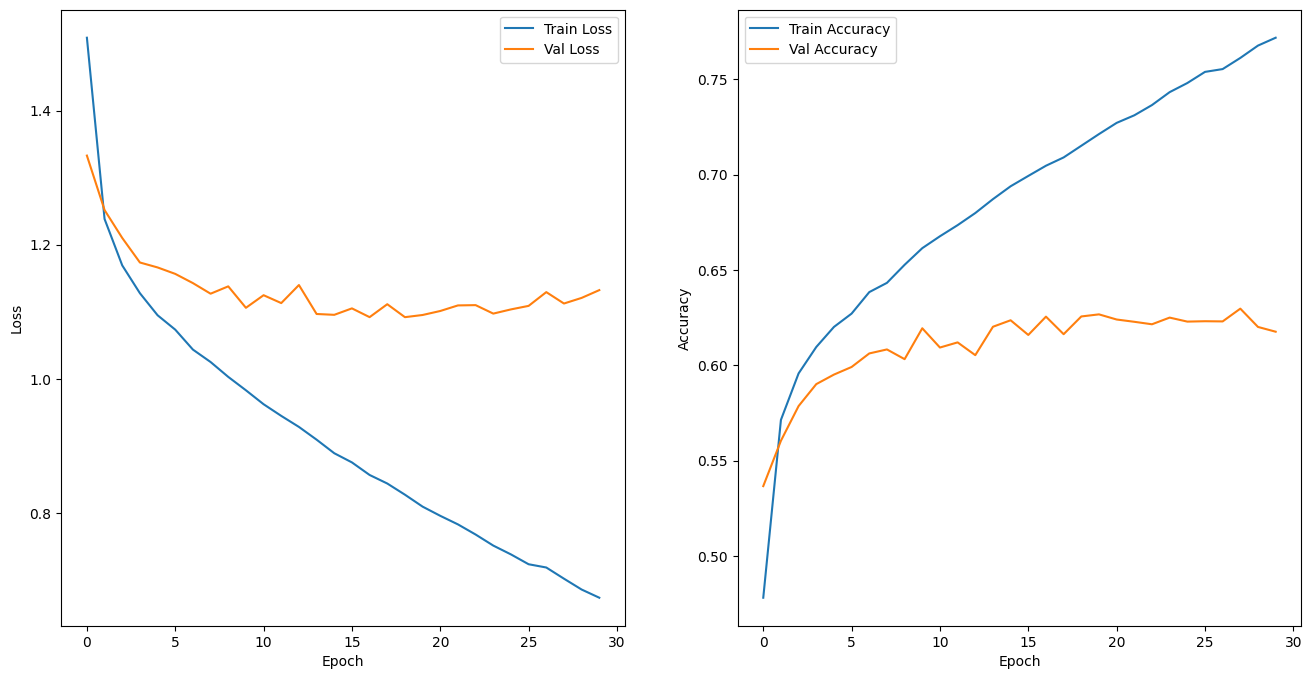

In [49]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

plot_history(history)

In [50]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_o  =to_categorical(y_test)
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 3s 9ms/step - loss: 1.1643 - accuracy: 0.6128


[1.1642791032791138, 0.6128000020980835]